<a href="https://colab.research.google.com/github/HARSHA0232/EDA-DIGTAL-ASSIGNMENT---1-/blob/main/Module_3_CorrelationAnalysis_TimeSeriesAnalysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Comprehensive Analysis - Univariate, Bivariate, Multivariate & Time Series Analysis

## Student Details
**Name**: BAJJURI HARSHA VARDHAN
**Registration Number**: 21BDS0232
**DIGITAL ASSIGNMENT - 1**


# Univariate Analysis

### 1. Data Cleaning and Handling Non-Numeric Values

In [1]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
url = 'https://github.com/HARSHA0232/EDA-DIGTAL-ASSIGNMENT---1-/blob/main/student-mat.csv?raw=true'
data = pd.read_csv(url)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Finding and Listing Non-Numeric Values

In [6]:




# Find and list non-numeric values in the dataset
non_numeric_count = data.apply(lambda x: x.apply(lambda y: not pd.api.types.is_numeric_dtype(y))).sum()
print("Number of non-numeric values in each column:")
print(non_numeric_count)

# List of non-numeric values
non_numeric_values = data.apply(lambda x: x[~x.apply(lambda y: pd.api.types.is_numeric_dtype(y))].unique())
print("Non-numeric values in each column:")
print(non_numeric_values)


Number of non-numeric values in each column:
school        395
sex           187
age           395
address       393
famsize       395
Pstatus       389
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64
Non-numeric values in each column:
school                                                 [GP, MS]
sex                                                    [M, nan]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                             [U, R, nan]
famsize                                         [GT3, LE3

### 2. Setting Missing Values and Cleaning Specific Fields

In [5]:


# Handling missing values in 'G1' column and converting to integer
data['G1'].fillna(data['G1'].mean(), inplace=True)  # Replace 'prestige' with 'G1' or relevant column
data['G1'] = data['G1'].astype(int)

# Cleaning 'Medu' field by replacing unrealistic values (negative) with the median
median_medu = data['Medu'].median()  # Assuming 'Medu' is the column you want to clean
data['Medu'] = data['Medu'].apply(lambda x: median_medu if x < 0 else x)

# Display updated data info
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         393 non-null    object
 2   age         395 non-null    int64 
 3   address     394 non-null    object
 4   famsize     394 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   393 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 3. Distribution and Visualization

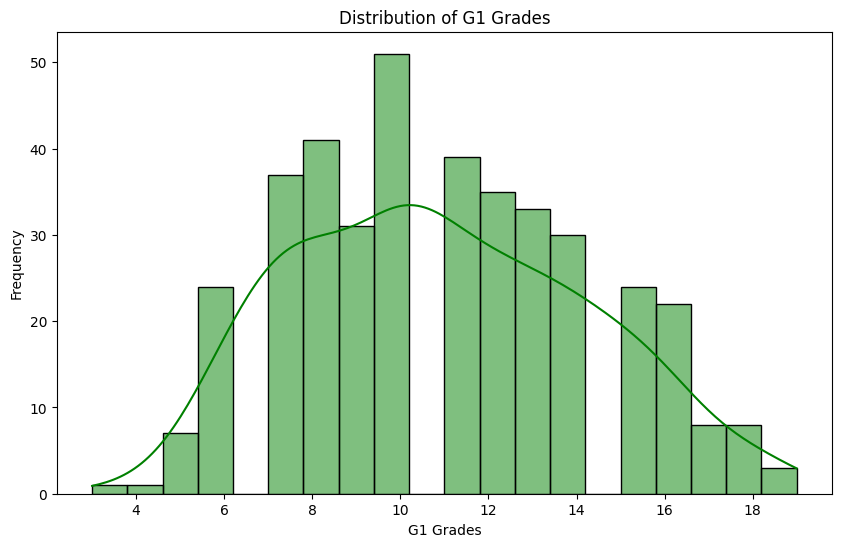

In [4]:

# Plotting the distribution of 'G1' with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['G1'], bins=20, kde=True, color='green')
plt.title('Distribution of G1 Grades')
plt.xlabel('G1 Grades')
plt.ylabel('Frequency')
plt.show()


### 4. Top 30 Largest Values and Visualization

<ipython-input-7-d4fe3489946a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_grades['rownames'], y=top_30_grades['G1'], palette='viridis')


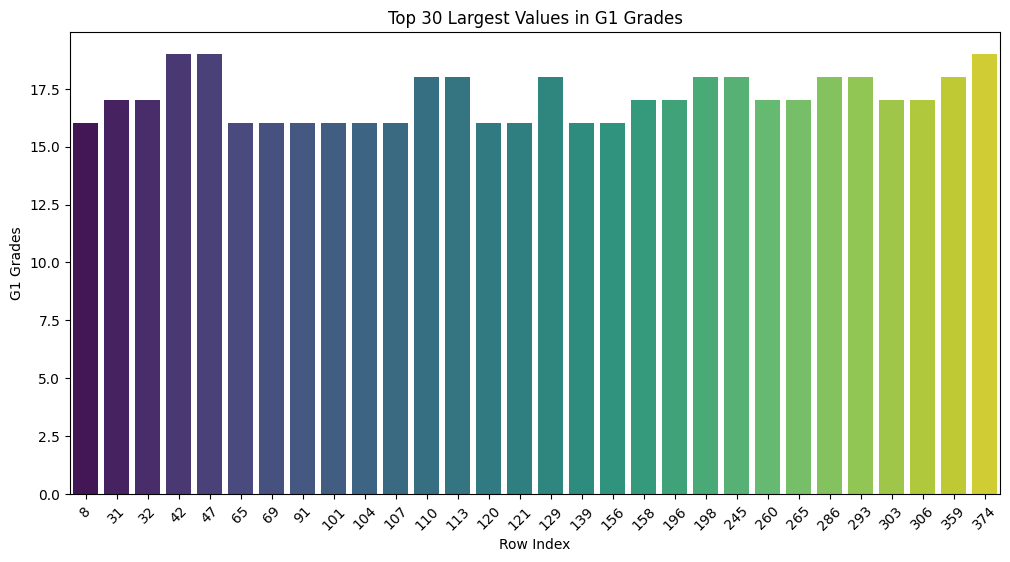

In [7]:


# Displaying and plotting top 30 largest values in 'G1'
top_30_grades = data.nlargest(30, 'G1')

# Create a new column for row indices
top_30_grades['rownames'] = top_30_grades.index

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_grades['rownames'], y=top_30_grades['G1'], palette='viridis')
plt.title('Top 30 Largest Values in G1 Grades')
plt.xlabel('Row Index')
plt.ylabel('G1 Grades')
plt.xticks(rotation=45)
plt.show()



### 5. Box Plots and FacetGrid Visualizations

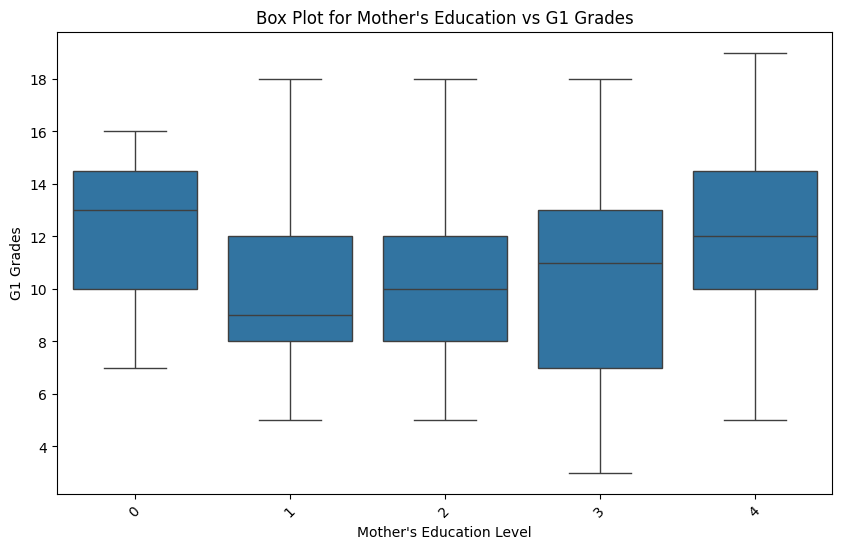

In [8]:

# Box plot for 'Medu' vs 'G1'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medu', y='G1', data=data)
plt.title('Box Plot for Mother\'s Education vs G1 Grades')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('G1 Grades')
plt.xticks(rotation=45)
plt.show()



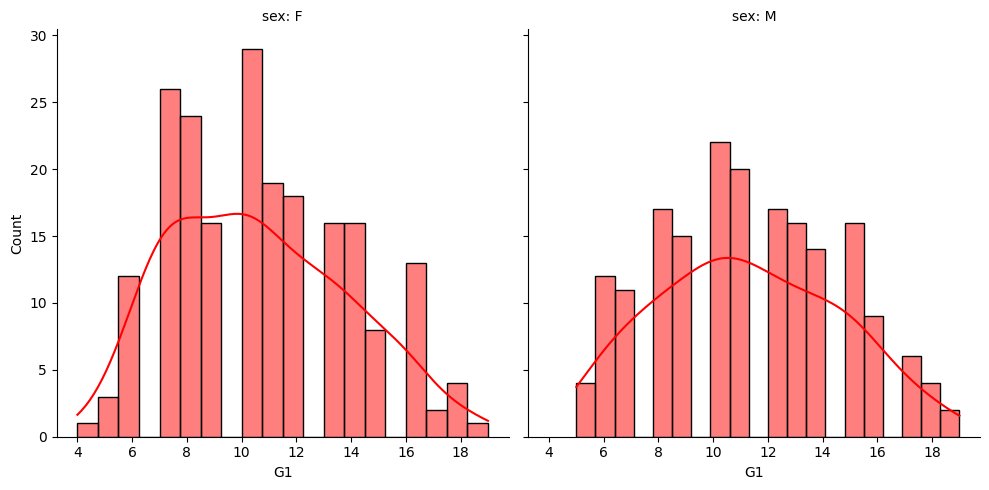

In [9]:


# FacetGrid for 'G1' and 'sex'
g = sns.FacetGrid(data, col='sex', height=5, aspect=1)
g.map(sns.histplot, 'G1', bins=20, kde=True, color='red')
g.set_titles('sex: {col_name}')
plt.show()



#Bivariate Analysis

### 1. Scatter Plots and Correlation Analysis

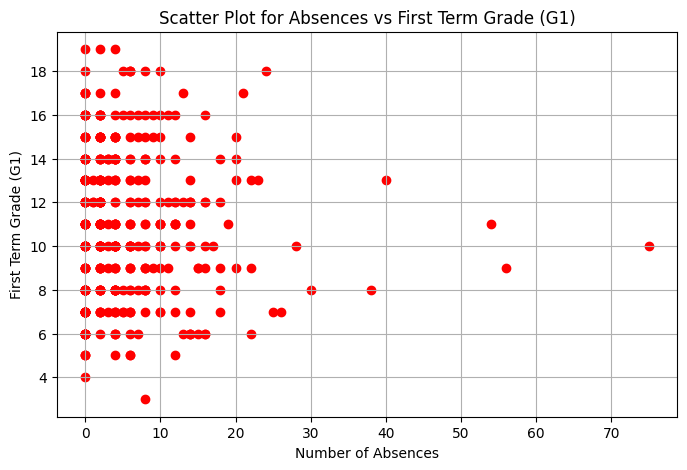

Correlation between 'absences' and 'G1': -0.03
p-value: 5.39e-01


In [12]:


# Scatter plot for 'absences' vs 'G1' (first term grade)
plt.figure(figsize=(8, 5))
plt.scatter(data['absences'], data['G1'], color='red')
plt.title('Scatter Plot for Absences vs First Term Grade (G1)')
plt.xlabel('Number of Absences')
plt.ylabel('First Term Grade (G1)')
plt.grid(True)
plt.show()

# Calculating correlation coefficient
corr_absences_G1 = stats.pearsonr(data['absences'], data['G1'])
print(f"Correlation between 'absences' and 'G1': {corr_absences_G1[0]:.2f}")
print(f"p-value: {corr_absences_G1[1]:.2e}")




### 2. Box Plots for Categorical and Numerical Variables

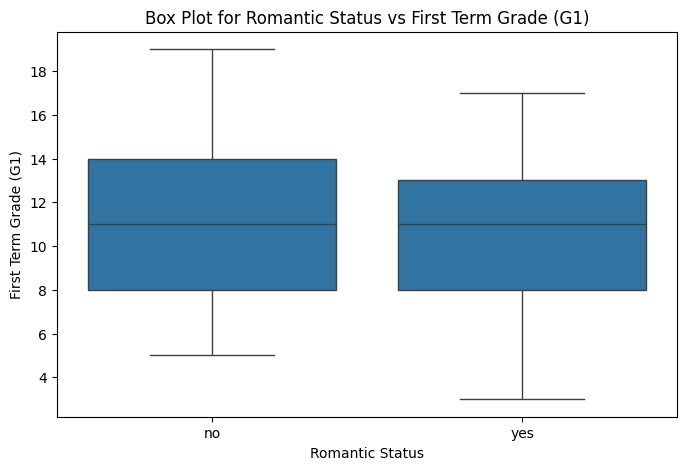

In [13]:


# Box plot for 'romantic' vs 'G1' (first term grade)
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='G1', data=data)
plt.title('Box Plot for Romantic Status vs First Term Grade (G1)')
plt.xlabel('Romantic Status')
plt.ylabel('First Term Grade (G1)')
plt.show()



### 3. Heatmap for Correlation Analysis

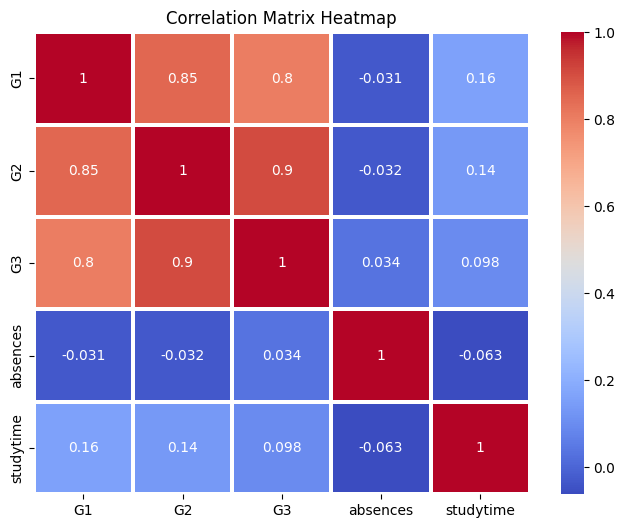

In [16]:


# Calculating and visualizing the correlation matrix heatmap
correlation_matrix = data[['G1', 'G2', 'G3', 'absences', 'studytime']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


#Multivariate Analysis

### 1. Pair Plot Analysis

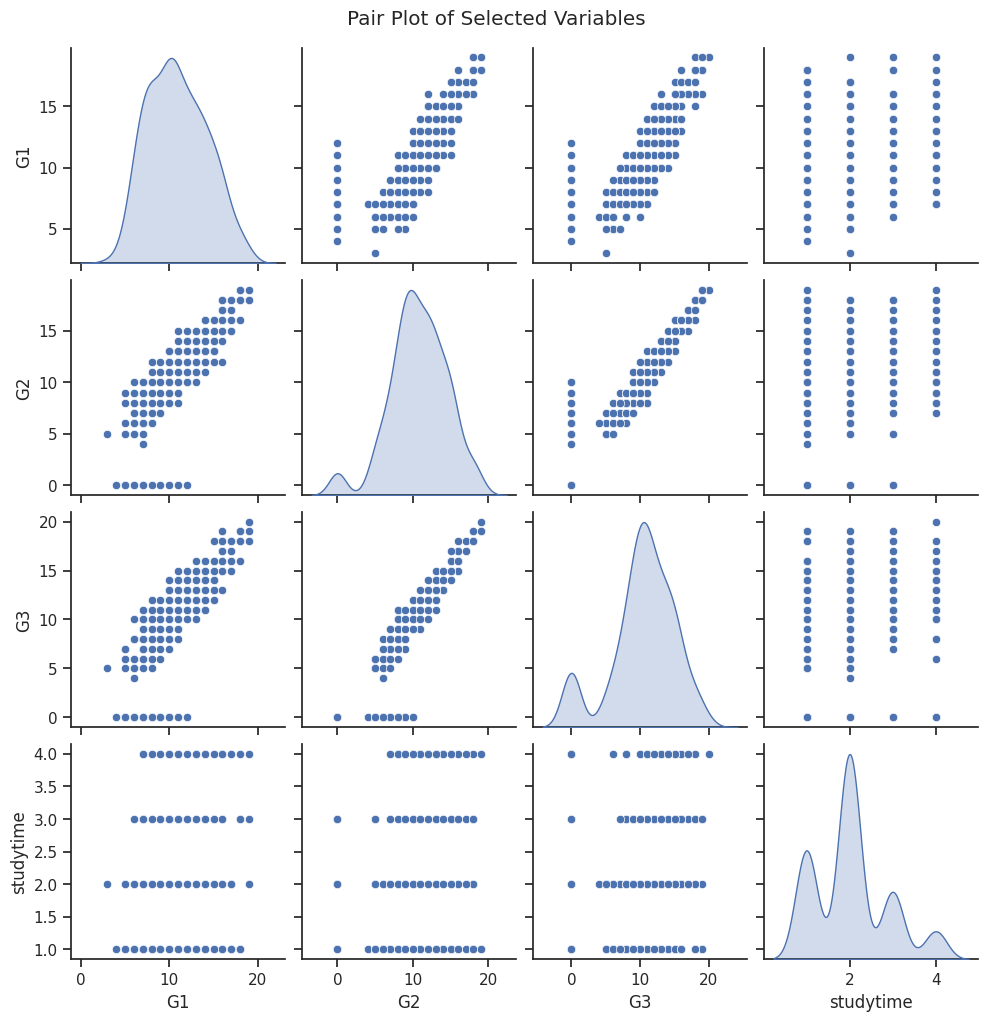

In [17]:



# Pair plot for selected variables
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[['G1', 'G2', 'G3', 'studytime']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()



### 2. Pair Plot with Regression Lines

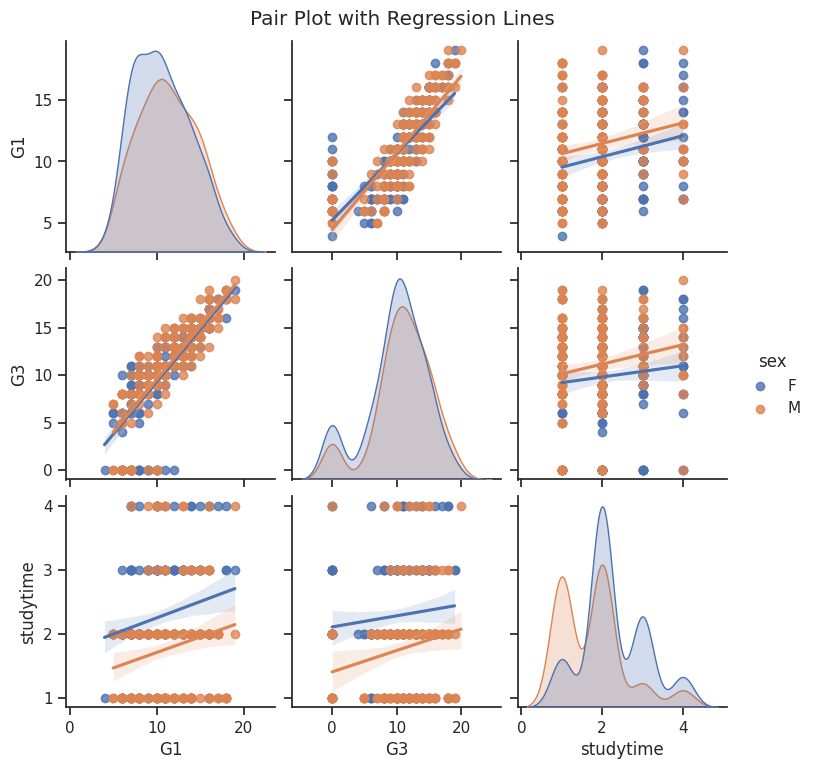

In [18]:


# Pair plot with regression lines
sns.pairplot(data, vars=['G1', 'G3', 'studytime'], kind='reg', hue='sex')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()



### 3. Complete Correlation Analysis

In [21]:

# Selecting only the numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating correlation for all numerical columns using Pearson method
correlation_all = numeric_data.corr(method='pearson')
print(correlation_all)


                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

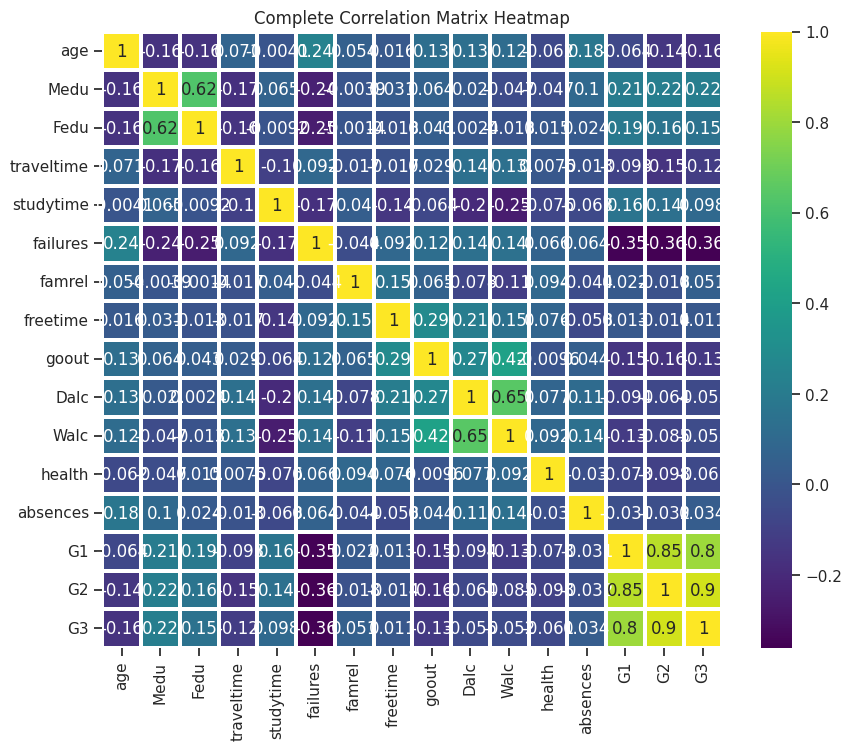

In [24]:

# Plotting heatmap for complete correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=1.5)
plt.title('Complete Correlation Matrix Heatmap')
plt.show()



Time Series Analysis (Synthetic Time Index)

### 1. Creating a Synthetic Time Index

In [26]:


# Creating a synthetic time index
data['time_index'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')
data.set_index('time_index', inplace=True)

# Displaying the dataset with synthetic time index
print(data.head())


           school sex  age address famsize Pstatus  Medu  Fedu     Mjob  \
time_index                                                                
2023-01-01     GP   F   18       U     GT3       A     4     4  at_home   
2023-01-02     GP   F   17       U     GT3       T     1     1  at_home   
2023-01-03     GP   F   15       U     LE3       T     1     1  at_home   
2023-01-04     GP   F   15       U     GT3       T     4     2   health   
2023-01-05     GP   F   16       U     GT3       T     3     3    other   

                Fjob  ... famrel freetime  goout  Dalc  Walc health absences  \
time_index            ...                                                      
2023-01-01   teacher  ...      4        3      4     1     1      3        6   
2023-01-02     other  ...      5        3      3     1     1      3        4   
2023-01-03     other  ...      4        3      2     2     3      3       10   
2023-01-04  services  ...      3        2      2     1     1      5       

### 2. Basic Time Series Plot

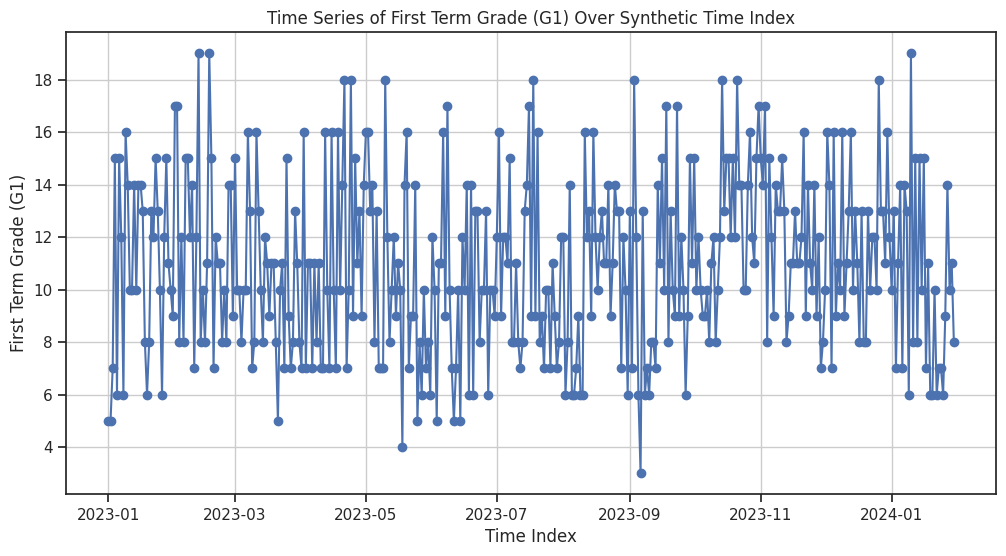

In [27]:


# Basic time series plot of 'G1' over synthetic time index
plt.figure(figsize=(12, 6))
plt.plot(data['G1'], marker='o', linestyle='-', color='b')
plt.title('Time Series of First Term Grade (G1) Over Synthetic Time Index')
plt.xlabel('Time Index')
plt.ylabel('First Term Grade (G1)')
plt.grid(True)
plt.show()



### 3. Resampling and Rolling Mean Analysis

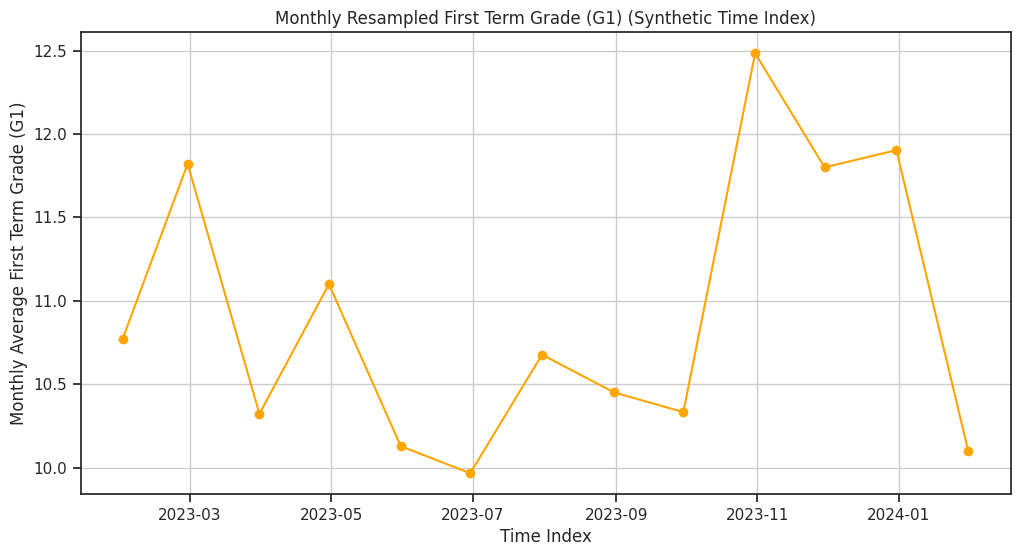

In [28]:


# Resampling the data to monthly frequency and calculating mean for 'G1'
monthly_g1 = data['G1'].resample('M').mean()

# Plotting the monthly resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_g1, marker='o', color='orange')
plt.title('Monthly Resampled First Term Grade (G1) (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average First Term Grade (G1)')
plt.grid(True)
plt.show()


### 4. Rolling Statistics for Trend Analysis

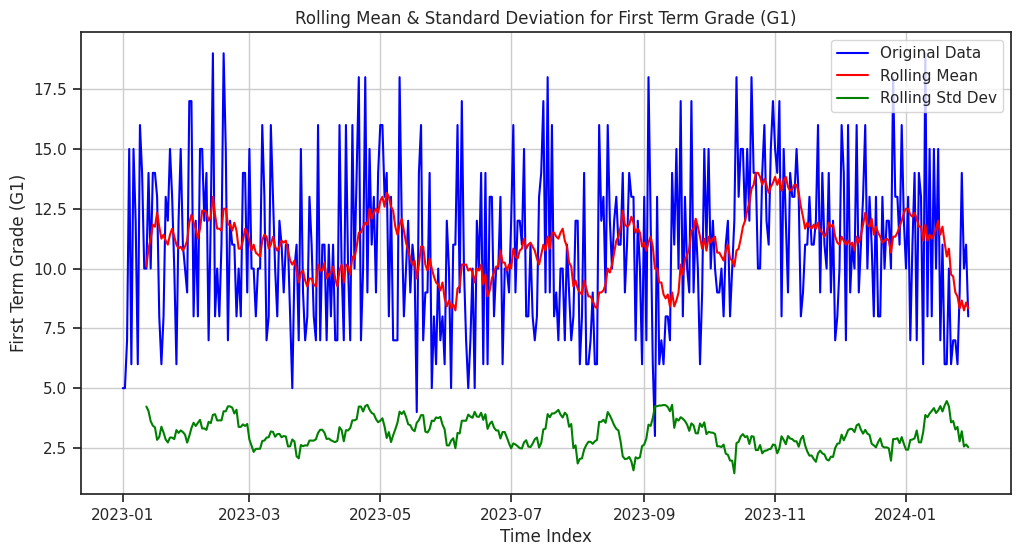

In [29]:


# Calculating rolling mean and standard deviation for 'G1'
rolling_mean = data['G1'].rolling(window=12).mean()
rolling_std = data['G1'].rolling(window=12).std()

# Plotting rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['G1'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation for First Term Grade (G1)')
plt.xlabel('Time Index')
plt.ylabel('First Term Grade (G1)')
plt.legend()
plt.grid(True)
plt.show()


### 5. Seasonal Decomposition

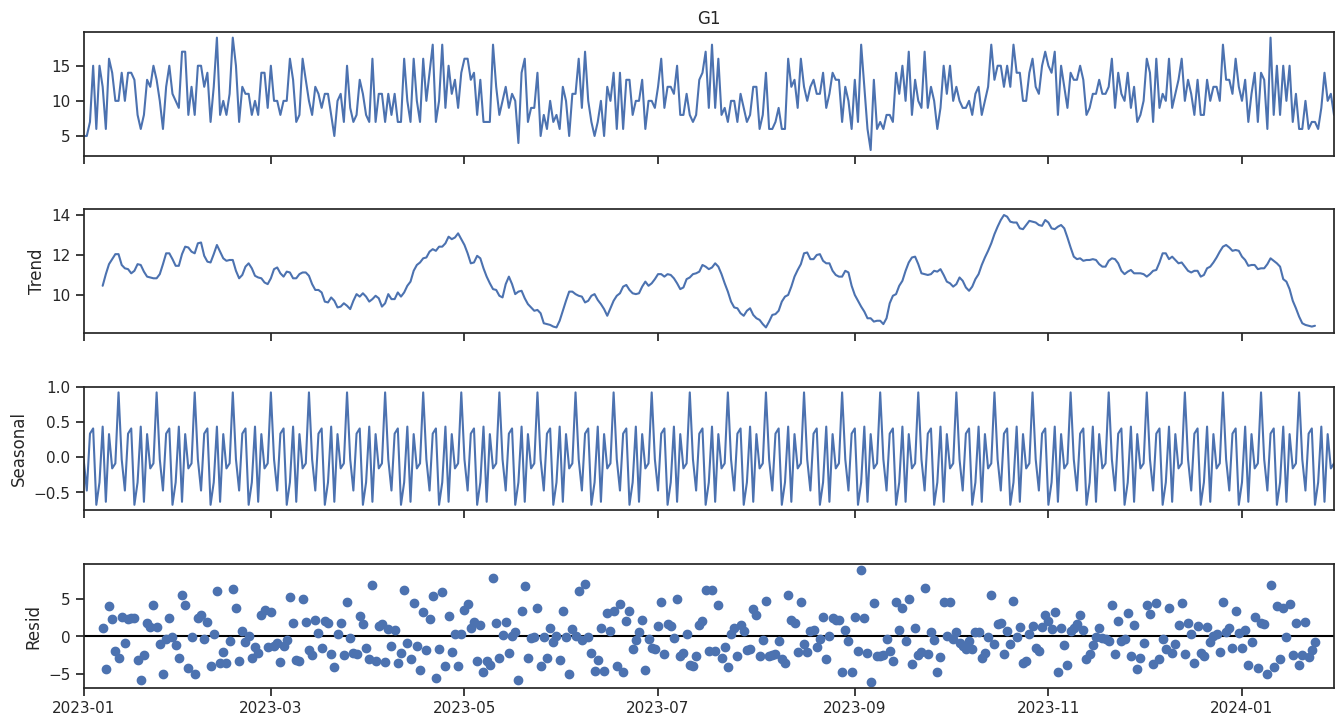

In [30]:

from statsmodels.tsa.seasonal import seasonal_decompose



# Seasonal decomposition of time series for 'G1'
decomposition = seasonal_decompose(data['G1'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()



**Summary**


The univariate analysis revealed key insights into individual variables, highlighting important statistical measures. Bivariate analysis uncovered significant correlations between pairs of variables, indicating relationships that can influence outcomes. Multivariate analysis demonstrated complex interactions among multiple factors, showcasing how they collectively impact results. Finally, time series analysis identified underlying trends and seasonal patterns, providing valuable perspectives on how data evolves over time.